<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Natural Langauge Processing</h1>
<h1>Sequence Modeling</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt 

from tqdm import tqdm
tqdm.pandas()

np.random.seed(123)

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: dcc62f994628bd6ae202ab542b8409b1167569d6

pandas    : 1.1.3
matplotlib: 3.3.2
keras     : 2.4.3
json      : 2.0.9
numpy     : 1.19.2
watermark : 2.1.0
tensorflow: 2.5.0



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the IMDB dataset

In [4]:
top_words = 10000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

word_dict = imdb.get_word_index()
word_list = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
word_list.extend([k for k, v in sorted(word_dict.items(), key = lambda x:x[1])])
word_list = np.array(word_list)

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# SimpleRNN model

In [6]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 36s 116ms/step - loss: 0.6516 - accuracy: 0.5952 - val_loss: 0.4359 - val_accuracy: 0.8144
Epoch 2/10
196/196 [==============================] - 34s 172ms/step - loss: 0.3477 - accuracy: 0.8605 - val_loss: 0.3734 - val_accuracy: 0.8402
Epoch 3/10
196/196 [==============================] - 22s 111ms/step - loss: 0.2679 - accuracy: 0.8894 - val_loss: 0.3725 - val_accuracy: 0.8440
Epoch 4/10
196/196 [==============================] - 20s 102ms/step - loss: 0.1768 - accuracy: 0.9345 - val_loss: 0.3958 - val_accuracy: 0.8394
Epoch 5/10
196/196 [==============================] - 20s 101ms/step - loss: 0.1044 - accuracy: 0.9658 - val_loss: 0.4534 - val_accuracy: 0.8448
Epoch 6/10
196/196 [==============================] - 20s 104ms/step - loss: 0.0554 - accuracy: 0.9841 - val_loss: 0.4911 - val_accuracy: 0.8334
Epoch 7/10
196/196 [==============================] - 36s 182ms/step - loss: 0.0315 - accuracy: 0.9931 - val_loss: 0.6242 - val_ac

In [8]:
def plot_history(history):    
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)

    epochs = np.array(history.epoch) + 1
    
    ax_lst[0].plot(epochs, history.history['loss'], label='Training')
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)
    
    best_epoch = np.argmin(history.history['val_loss']) + 1
    ax_lst[0].axvline(x=best_epoch, linestyle=':', color=colors[2])
    ax_lst[0].legend()
    

    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)
    ax_lst[1].axvline(x=best_epoch, linestyle=':', color=colors[2])


    fig.tight_layout()

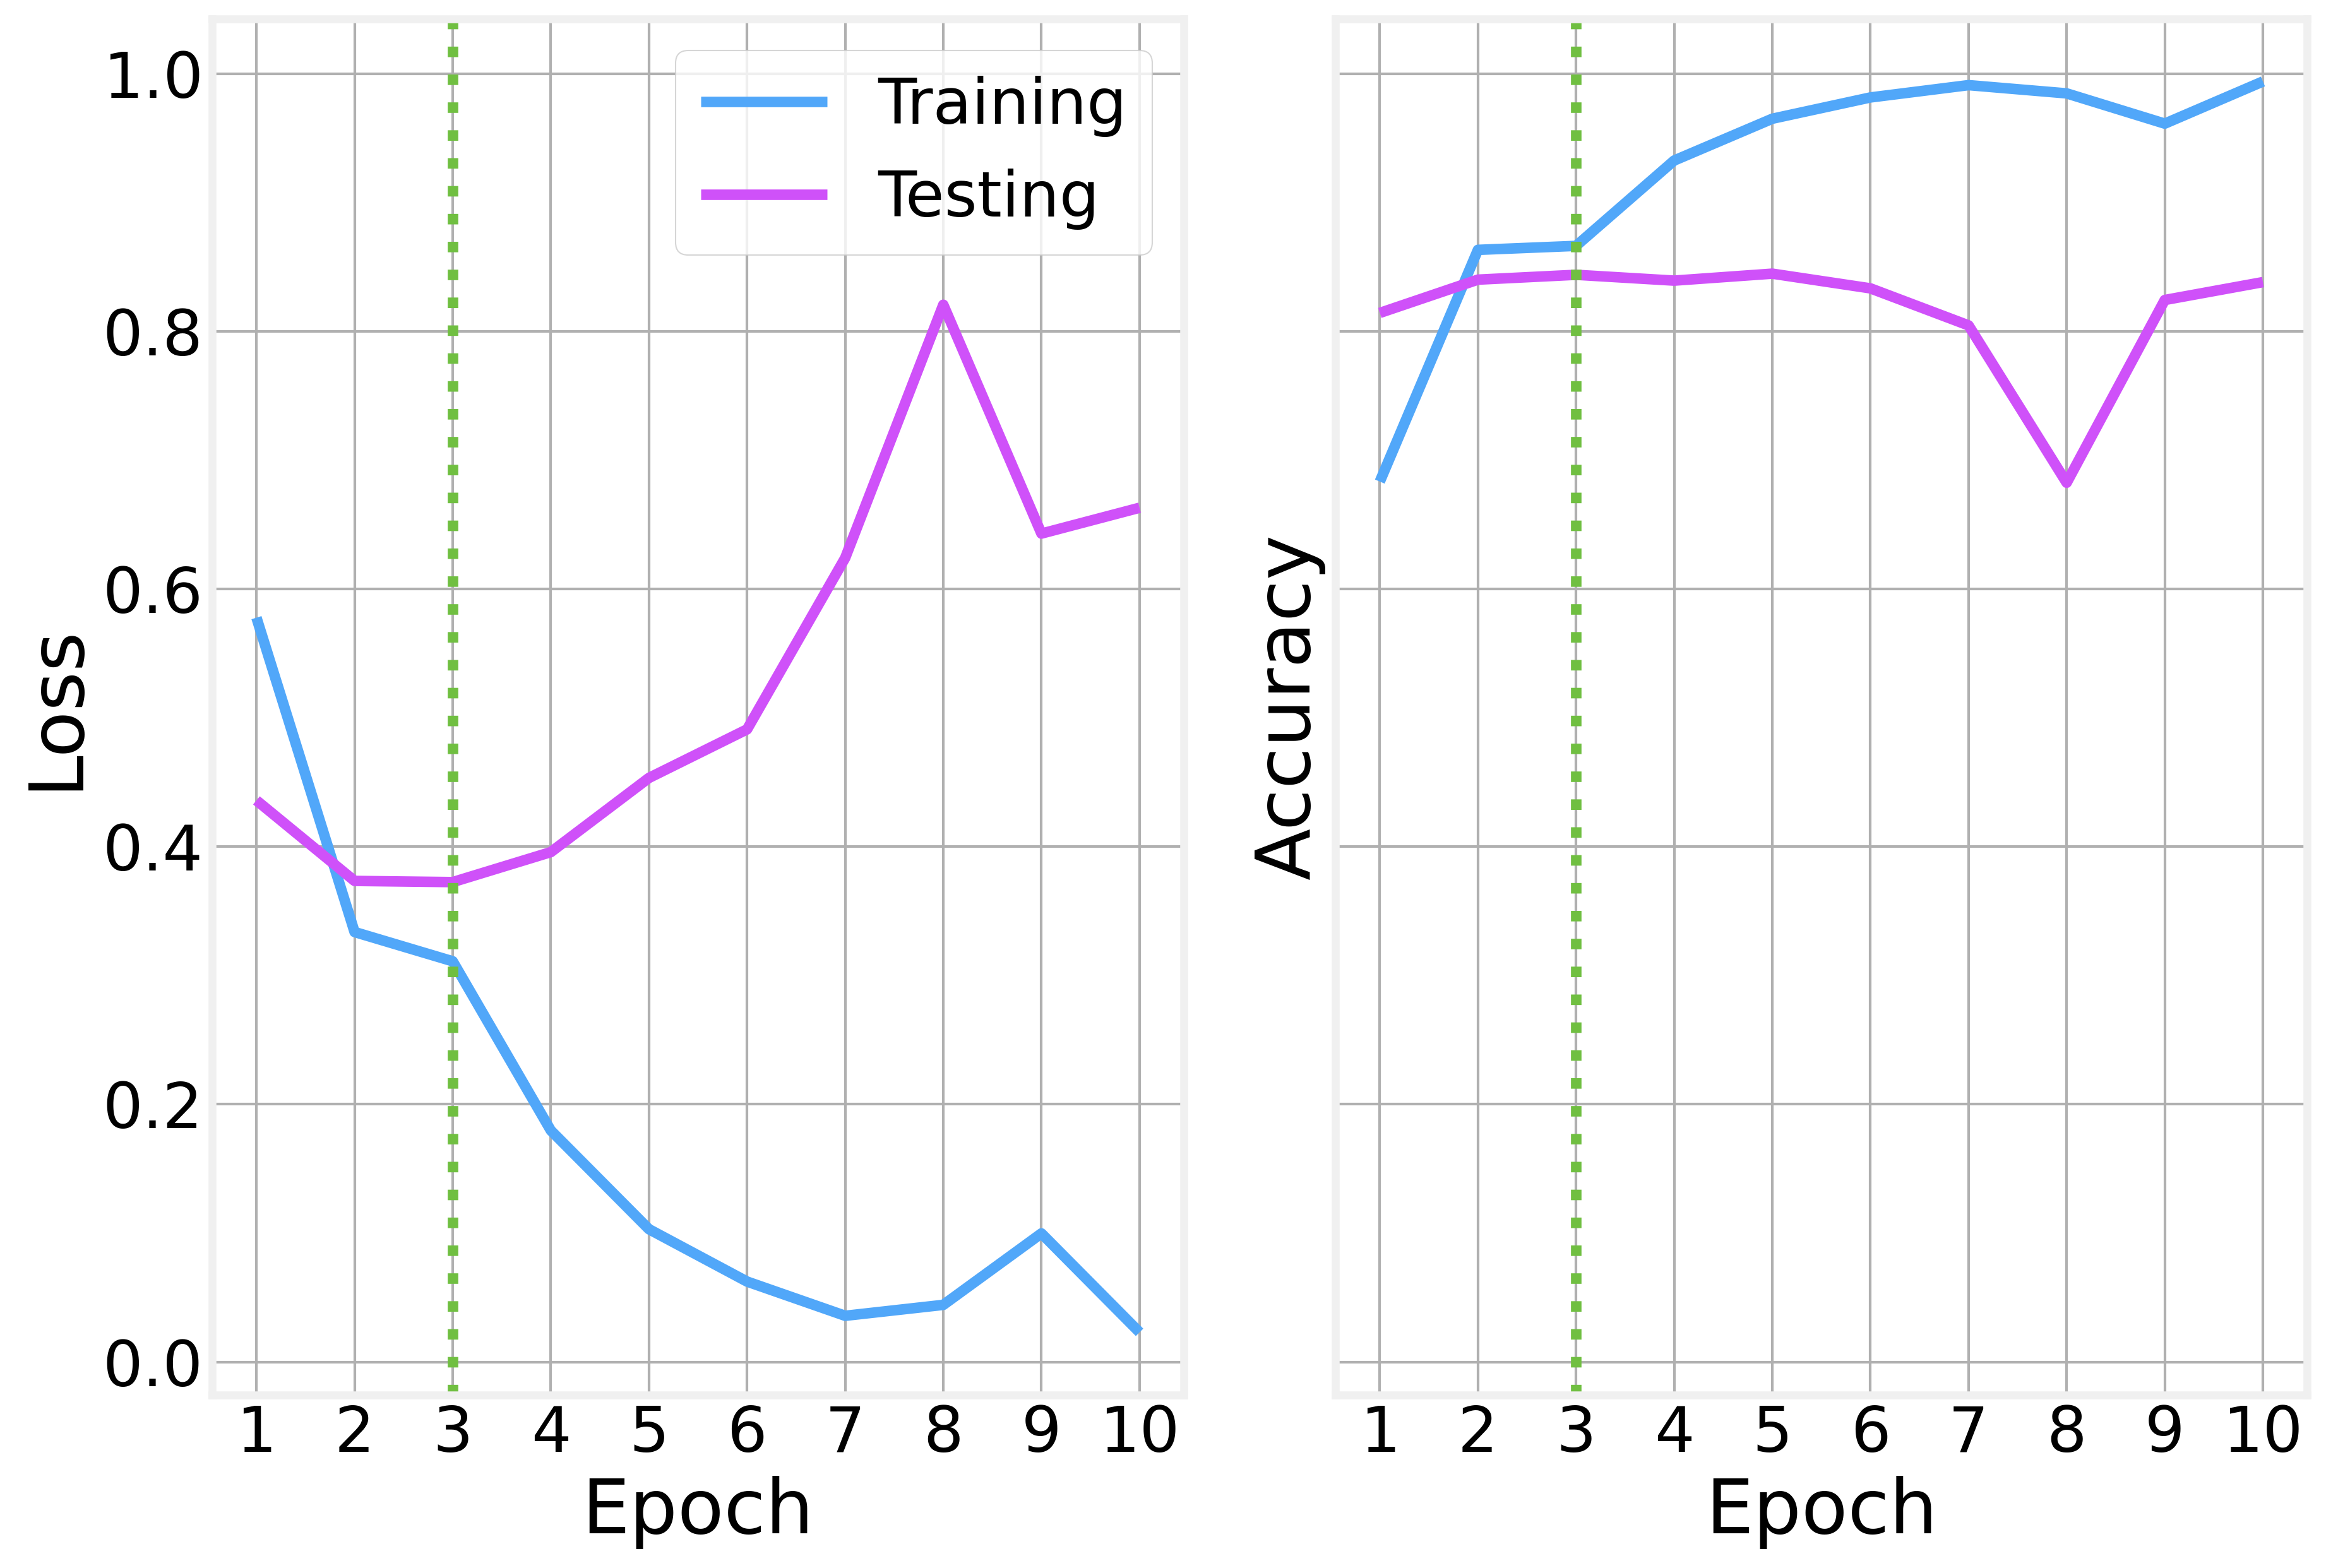

In [9]:
plot_history(history)

# GRU

In [10]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 37s 178ms/step - loss: 0.6210 - accuracy: 0.6196 - val_loss: 0.3365 - val_accuracy: 0.8577
Epoch 2/10
196/196 [==============================] - 34s 174ms/step - loss: 0.2808 - accuracy: 0.8889 - val_loss: 0.3171 - val_accuracy: 0.8695
Epoch 3/10
196/196 [==============================] - 35s 178ms/step - loss: 0.2027 - accuracy: 0.9266 - val_loss: 0.3224 - val_accuracy: 0.8665
Epoch 4/10
196/196 [==============================] - 35s 181ms/step - loss: 0.1507 - accuracy: 0.9484 - val_loss: 0.3430 - val_accuracy: 0.8681
Epoch 5/10
196/196 [==============================] - 37s 188ms/step - loss: 0.1235 - accuracy: 0.9604 - val_loss: 0.4017 - val_accuracy: 0.8646
Epoch 6/10
196/196 [==============================] - 36s 184ms/step - loss: 0.1179 - accuracy: 0.9621 - val_loss: 0.4002 - val_accuracy: 0.8568
Epoch 7/10
196/196 [==============================] - 35s 181ms/step - loss: 0.1018 - accuracy: 0.9670 - val_loss: 0.4142 - val_ac

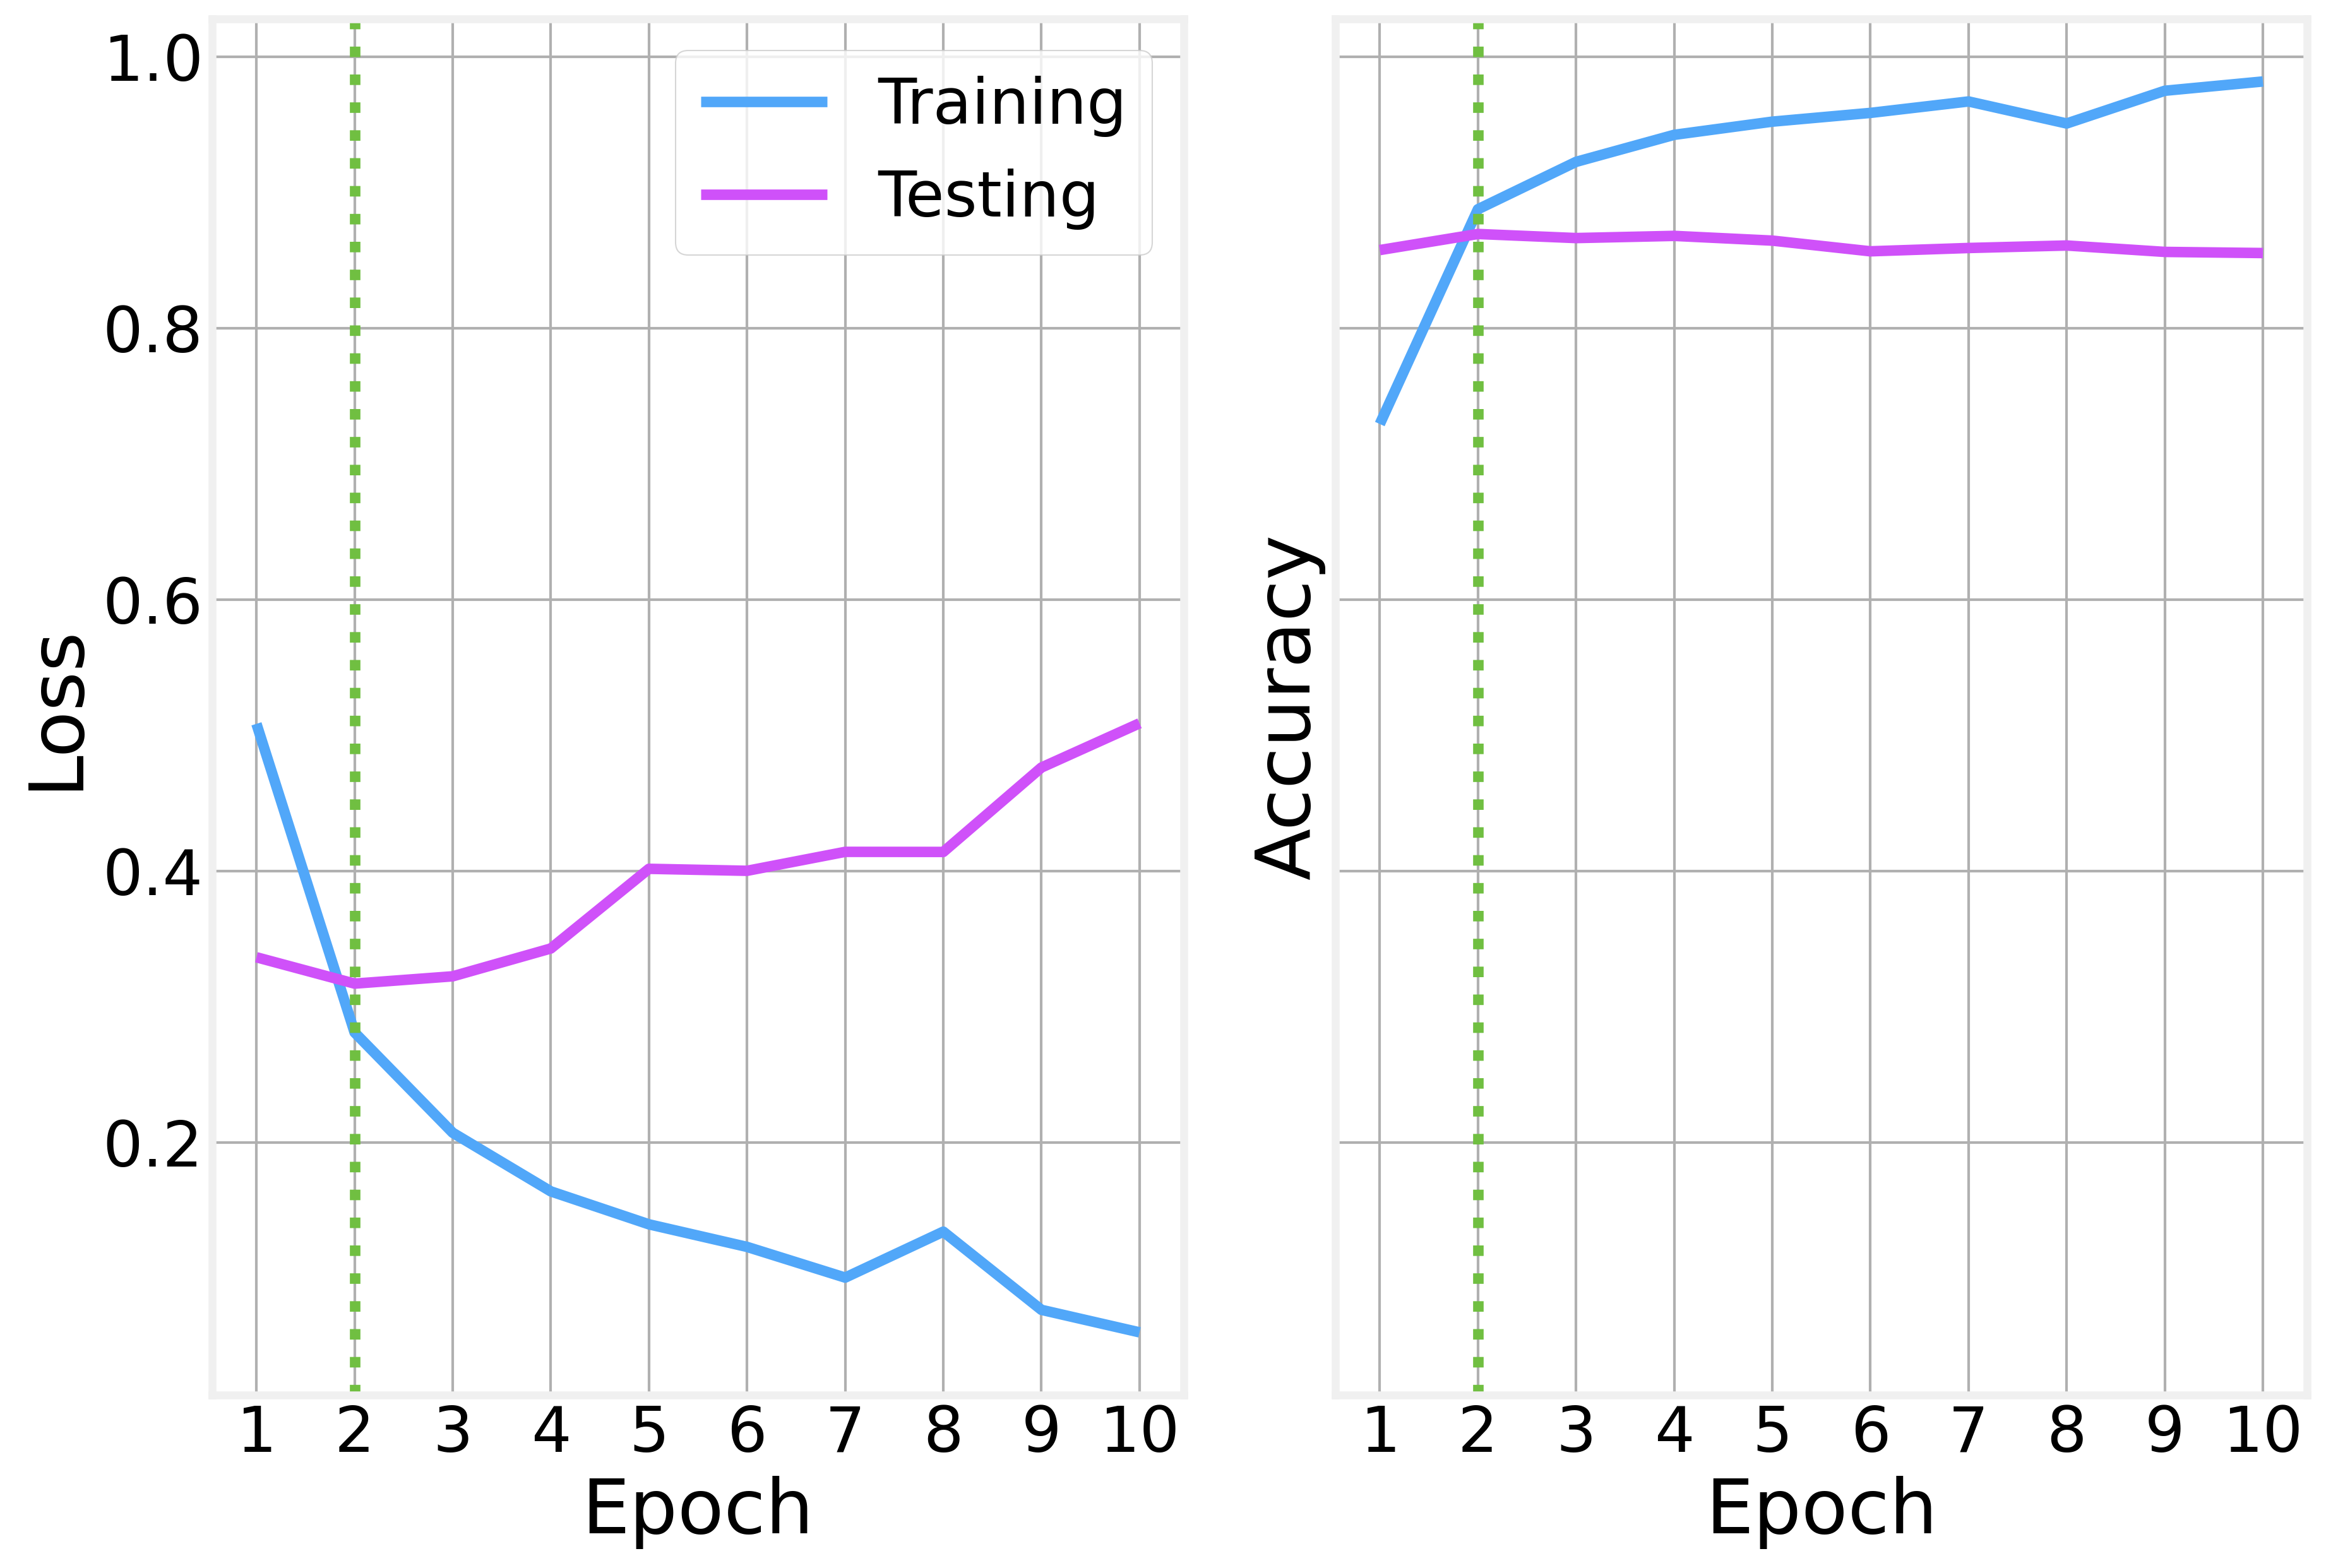

In [12]:
plot_history(history)

# LSTM

In [13]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 39s 186ms/step - loss: 0.5759 - accuracy: 0.6859 - val_loss: 0.3677 - val_accuracy: 0.8484
Epoch 2/10
196/196 [==============================] - 36s 181ms/step - loss: 0.2675 - accuracy: 0.9026 - val_loss: 0.3296 - val_accuracy: 0.8742
Epoch 3/10
196/196 [==============================] - 37s 187ms/step - loss: 0.1681 - accuracy: 0.9431 - val_loss: 0.3130 - val_accuracy: 0.8701
Epoch 4/10
196/196 [==============================] - 34s 176ms/step - loss: 0.1455 - accuracy: 0.9518 - val_loss: 0.3268 - val_accuracy: 0.8694
Epoch 5/10
196/196 [==============================] - 36s 182ms/step - loss: 0.1242 - accuracy: 0.9592 - val_loss: 0.4199 - val_accuracy: 0.8637
Epoch 6/10
196/196 [==============================] - 35s 180ms/step - loss: 0.0872 - accuracy: 0.9728 - val_loss: 0.4147 - val_accuracy: 0.8615
Epoch 7/10
196/196 [==============================] - 36s 182ms/step - loss: 0.0835 - accuracy: 0.9745 - val_loss: 0.4478 - val_ac

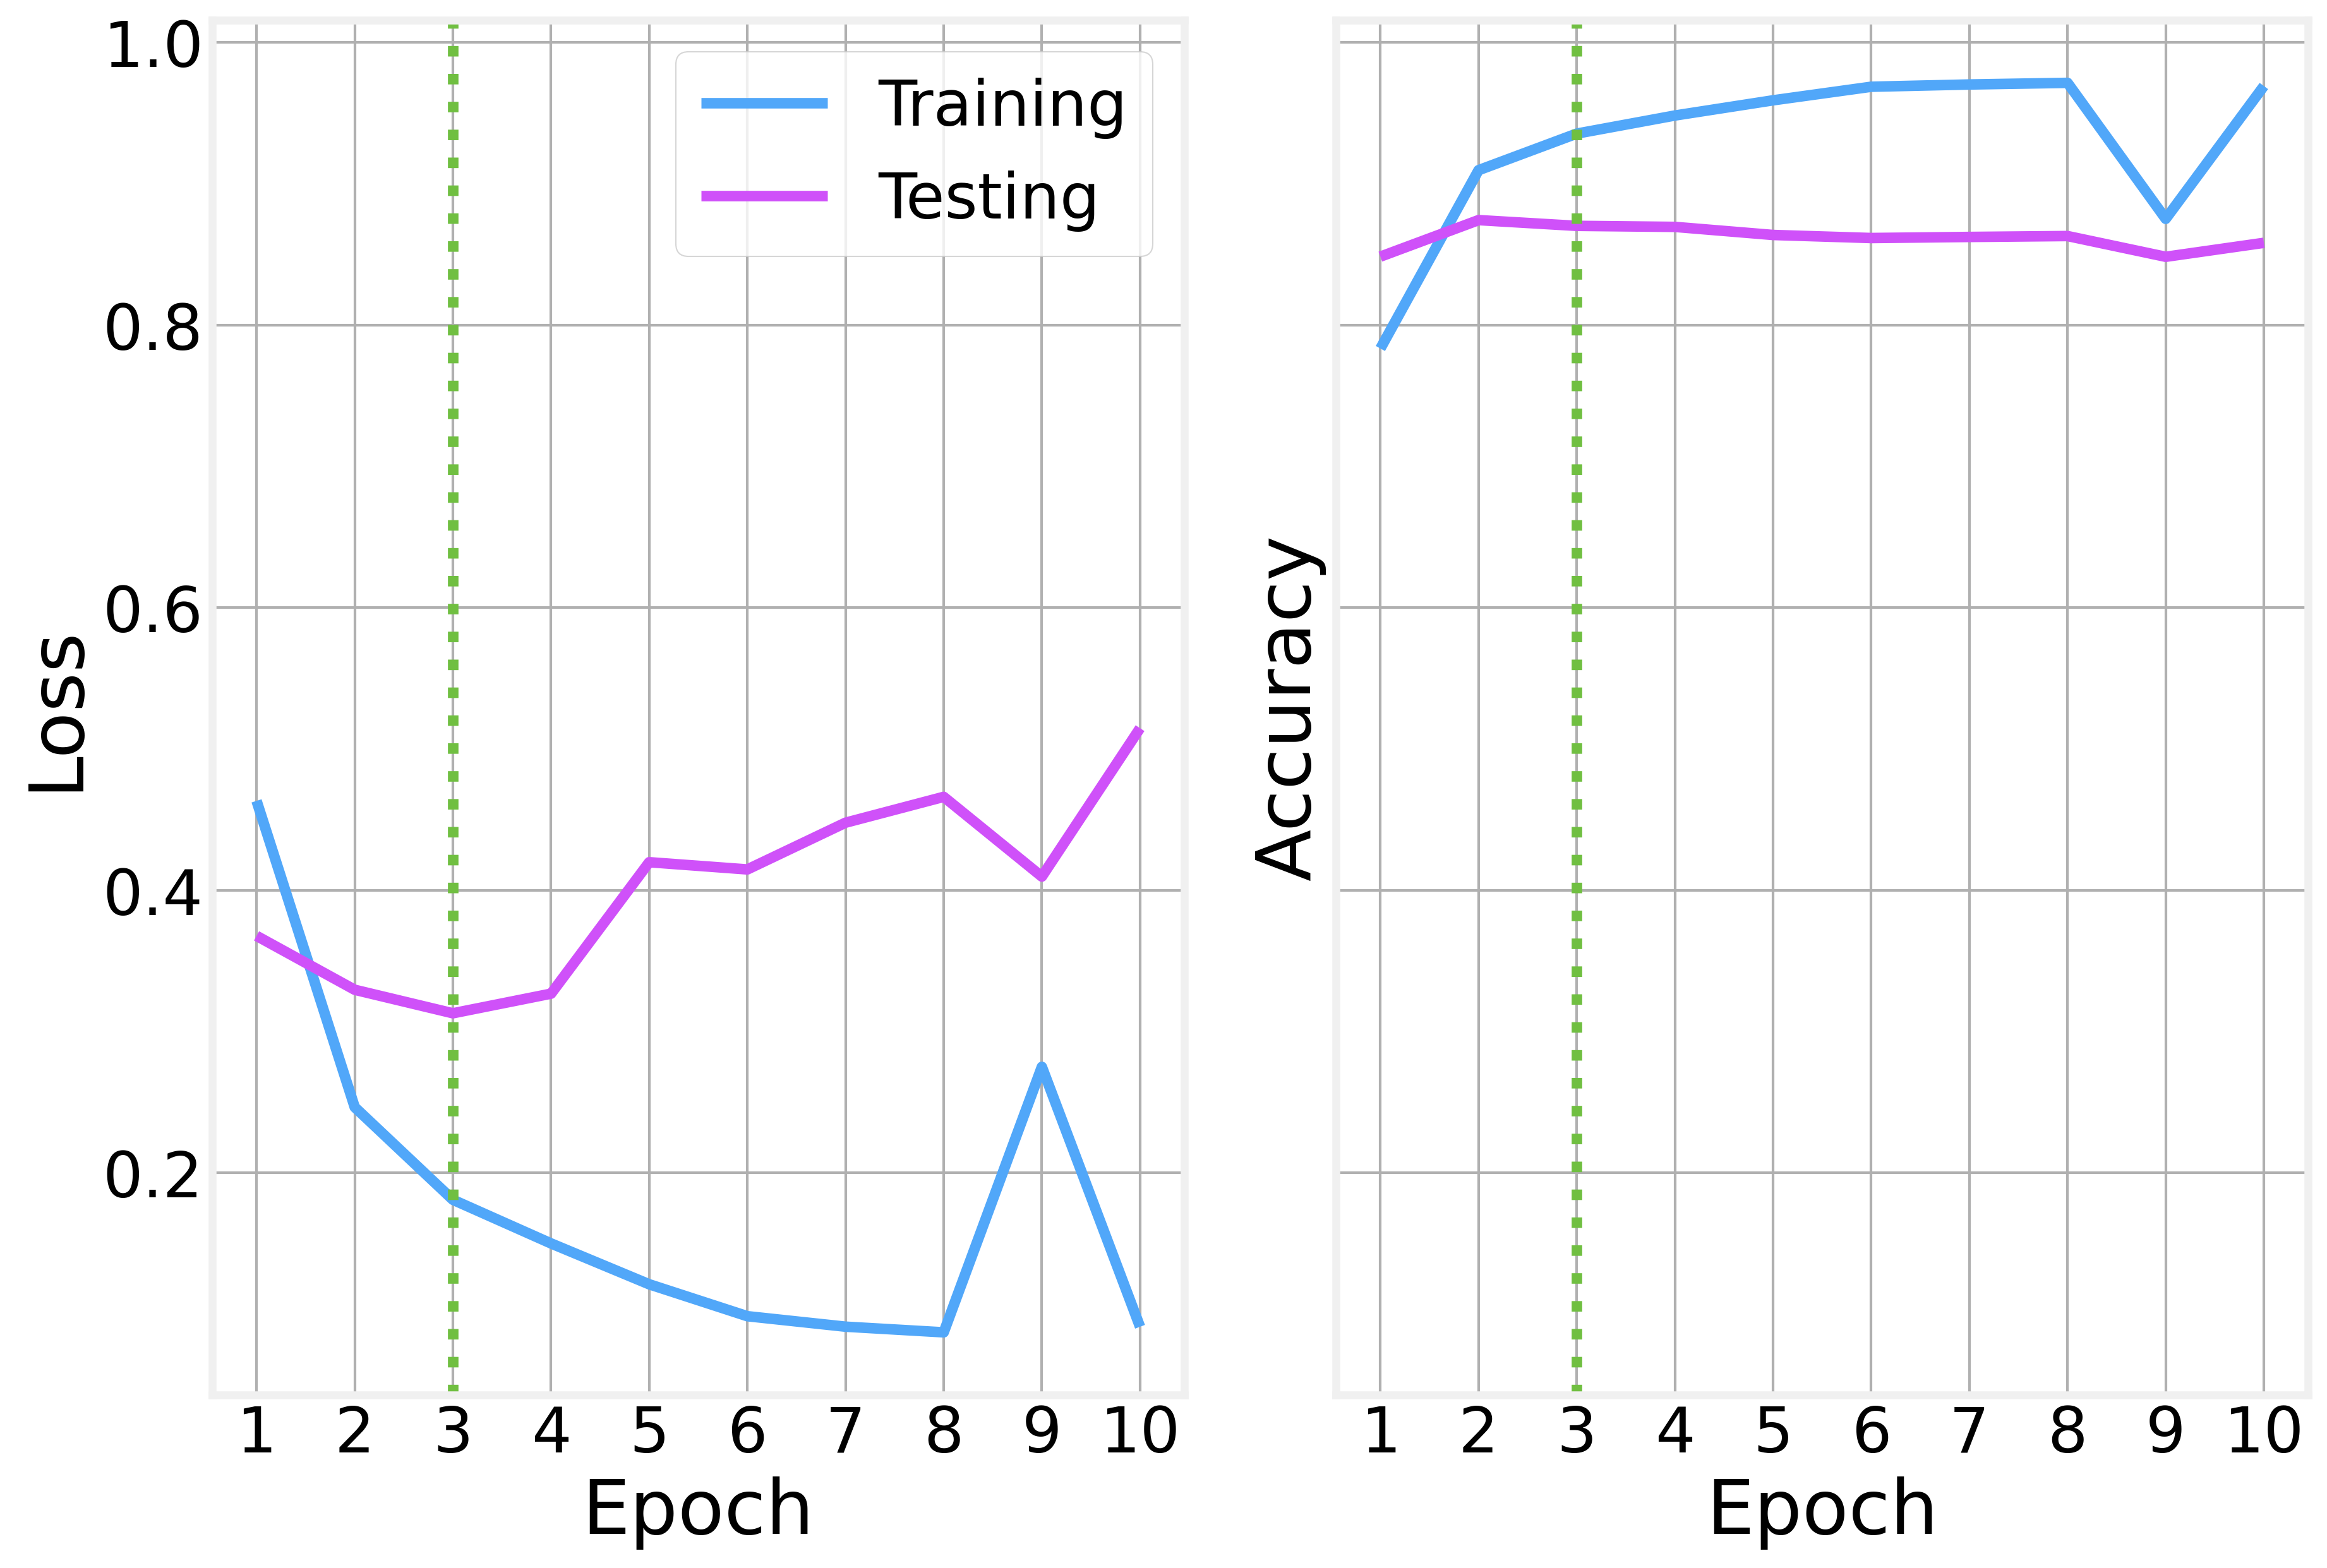

In [15]:
plot_history(history)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>